In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

#2 5 10
#PCA sykit lab

#Change Path based on Computer being used
ClothingData = pd.read_csv(r"C:\Users\Adam\Documents\Python Scripts\ClothesDataset\images.csv") #dataset csv path
path="C:\\Users\\Adam\\Documents\\Python Scripts\\ClothesDataset\\images_compressed\\" #path to where original images are stored
path2="C:\\Users\\Adam\\Documents\\Python Scripts\\ClothesDataset\\ClassifiedName\\" #path where images after processed are stored


In [6]:
#gameSales=pd.read_csv("vgsales.csv")

In [7]:
#gameSales

In [8]:


#df = pd.DataFrame(gameSales)
  
#X = list(df.iloc[:, 0])
#Y = list(df.iloc[:, 1])
  
# Plot the data using bar() method
#plt.bar(X, Y, color='g')
#plt.title("Students over 11 Years")

  
# Show the plot
#plt.show()

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [10]:
ClothingData = ClothingData.drop('sender_id', axis=1)
ClothingData = ClothingData.drop('kids', axis=1)

In [11]:
ClothingData

,image,label
0,4285fab0-751a-4b74-8e9b-43af05deee22,Not sure
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,T-Shirt
2,00627a3f-0477-401c-95eb-92642cbe078d,Not sure
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,Shoes
...,...,...
5398,dfd4079d-967b-4b3e-8574-fbac11b58103,Shorts
5399,befa14be-8140-4faf-8061-1039947e329d,Body
5400,5379356a-40ee-4890-b416-2336a7d84061,Shorts
5401,65507fb8-3456-4c15-b53e-d1b03bf71a59,Shoes


In [12]:
from pathlib import Path
from PIL import Image
import os

path="C:\\Users\\Adam\\Documents\\Python Scripts\\ClothesDataset\\images_compressed\\" #changed to the host datapath 
path2="C:\\Users\\Adam\\Documents\\Python Scripts\\ClothesDataset\\ClassifiedName\\"
# iterate over the unique label 
for item_name in ClothingData.label.unique(): 
    
    # create folder according to the label name 
    #item_folder = Path(f"{item_name}/")
    item_folder = Path(path2+f"{item_name}/")
    item_folder.mkdir(parents=True, exist_ok=True)
    
    # store id and gt for unique labels
    id = []
    gt = []
    
    # iterate over all possible number of unique labels 
    for id_label in ClothingData.loc[ClothingData['label'] == item_name].values.tolist():
        # id_label :['image_id', 'label']
        id.append(id_label[0]) # image_id
        gt.append(id_label[1]) # label
        
       # img = Image.open() # read the image 
#img = Image.open(id_label[0]) # read the image 
           
        try:
            #get image and save as grayscale
            img=Image.open(os.path.join(path,id_label[0])+".jpg").convert('L')
            
         
        except:
            print("unreadable file: "+id_label[0])
                  
                
        
       # Resize Image
        basewidth = 300
        wpercent = (basewidth / float(img.size[0]))
        hsize = int((float(img.size[1]) * float(wpercent)))
        img = img.resize((basewidth, hsize), Image.ANTIALIAS)
            
            
        img.save(f'{item_folder}/{id_label[0]}'+".jpg") # and save to target folder 
    
    # save the individual ground truth 
    # to the concern directory 
    label = pd.DataFrame({ 
            'Image Index': id,
            'labels': gt
        })
#label.to_csv(f'{path2}/{item_folder}.csv', index=False)

    label.to_csv(f'{item_folder}.csv', index=False)

C:\Users\Adam\AppData\Local\Temp\ipykernel_17800\3629242934.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((basewidth, hsize), Image.ANTIALIAS)


unreadable file: d028580f-9a98-4fb5-a6c9-5dc362ad3f09
unreadable file: 1d0129a1-f29a-4a3f-b103-f651176183eb
unreadable file: 784d67d4-b95e-4abb-baf7-8024f18dc3c8
unreadable file: c60e486d-10ed-4f64-abab-5bb698c736dd
unreadable file: 040d73b7-21b5-4cf2-84fc-e1a80231b202


In [13]:
print(label)

                              Image Index  labels
0    396cdf47-f336-491c-919c-ae80cf1d02ba  Blazer
1    5008492c-339e-454c-b741-a676d22f1f5c  Blazer
2    0d9f1bf9-0008-4247-b22b-832ab1c62a70  Blazer
3    67242183-82be-491d-84cb-cd0ae9d00e19  Blazer
4    1fd19366-a938-4eb3-83c9-4bc474f495be  Blazer
..                                    ...     ...
104  ad19b17f-66d9-4f5b-8a90-9539f0311806  Blazer
105  cb24db34-d06c-4671-89a7-7f5e5eee7cdc  Blazer
106  64937043-1a83-4440-a5b3-c05f35bbe4fe  Blazer
107  4cd9a0b0-4953-47fb-b8d0-4eb9b3616b29  Blazer
108  7fe3f9b7-ccee-4d88-a165-389762f3d77a  Blazer

[109 rows x 2 columns]


Skirt Image Before Prelimenary Pre-Processing


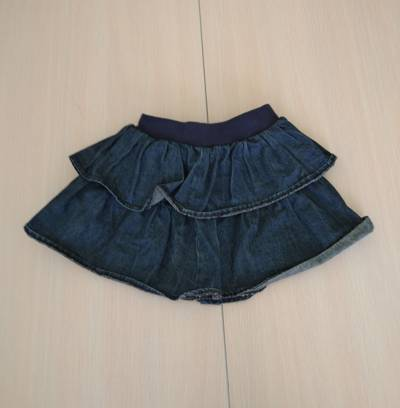

In [14]:
from IPython.display import Image


print("Skirt Image Before Prelimenary Pre-Processing")
Image(filename=path+'32b99302-cec7-4dec-adfa-3d4029674209.jpg') 

Skirt Image After Prelimenary Pre-Processing


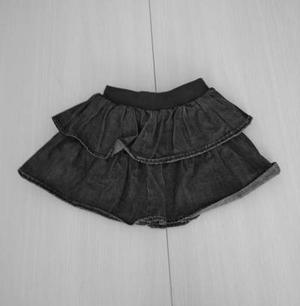

In [15]:
print("Skirt Image After Prelimenary Pre-Processing")
Image(filename=path2+'Skirt\\32b99302-cec7-4dec-adfa-3d4029674209.jpg') 

Polo Image Before Prelimenary Pre-Processing


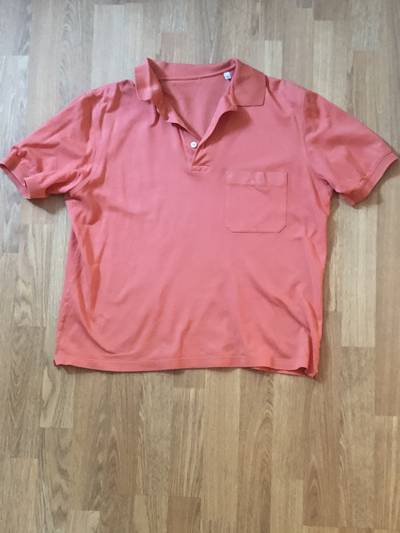

In [16]:
print("Polo Image Before Prelimenary Pre-Processing")
Image(filename=path+'0cab4de0-5818-4680-a00a-35dbc6e95525.jpg') 

Polo Image After Prelimenary Pre-Processing


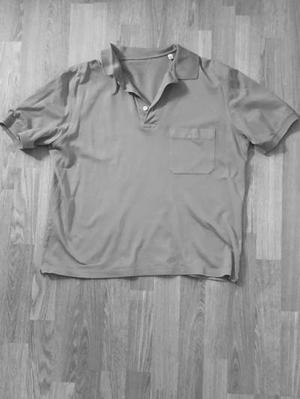

In [17]:
print("Polo Image After Prelimenary Pre-Processing")
Image(filename=path2+'Polo//0cab4de0-5818-4680-a00a-35dbc6e95525.jpg') 

Polo Image Before Prelimenary Pre-Processing


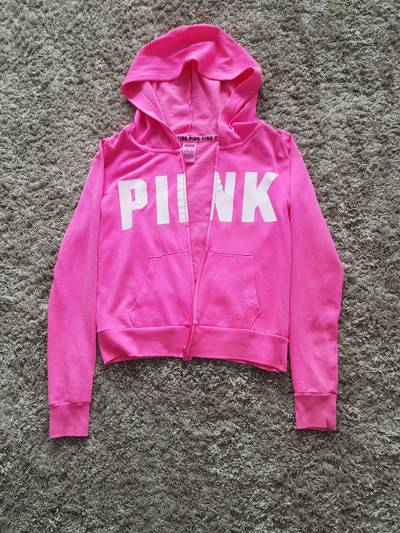

In [18]:
print("Polo Image Before Prelimenary Pre-Processing")
Image(filename=path+'000d31f6-44b5-4758-8d86-c4fcfb234392.jpg') 

Polo Image After Prelimenary Pre-Processing


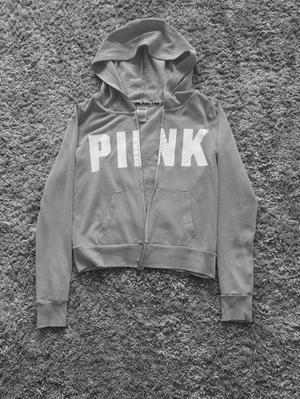

In [19]:
print("Polo Image After Prelimenary Pre-Processing")
Image(filename=path2+'hoodie//000d31f6-44b5-4758-8d86-c4fcfb234392.jpg') 

Dress Image Before Prelimenary Pre-Processing


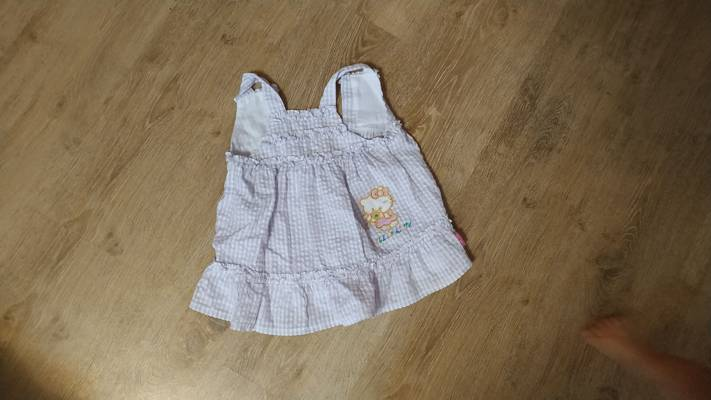

In [20]:
print("Dress Image Before Prelimenary Pre-Processing")
Image(filename=path+'744c6ec1-4bdd-4836-8cec-833449eb2f00.jpg') 

Dress Image After Prelimenary Pre-Processing


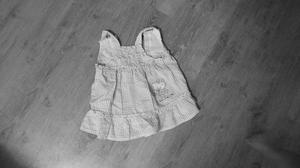

In [21]:
print("Dress Image After Prelimenary Pre-Processing")
Image(filename=path2+'Dress//744c6ec1-4bdd-4836-8cec-833449eb2f00.jpg') 

Blazer Image Before Prelimenary Pre-Processing


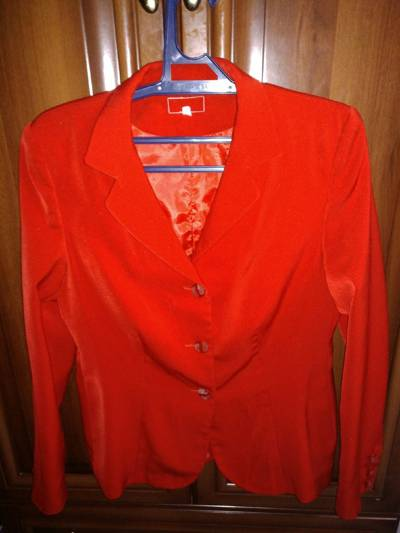

In [22]:
print("Blazer Image Before Prelimenary Pre-Processing")
Image(filename=path+'8359ddd5-40ae-47e1-b114-f09aa6ab5995.jpg') 

Blazer Image After Prelimenary Pre-Processing


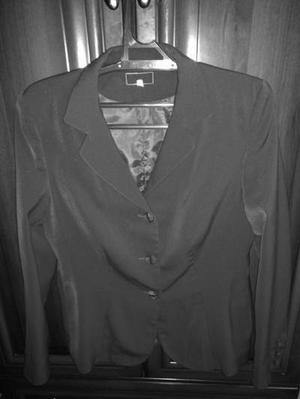

In [23]:
print("Blazer Image After Prelimenary Pre-Processing")
Image(filename=path2+'Blazer//8359ddd5-40ae-47e1-b114-f09aa6ab5995.jpg') 

Top Image Before Prelimenary Pre-Processing


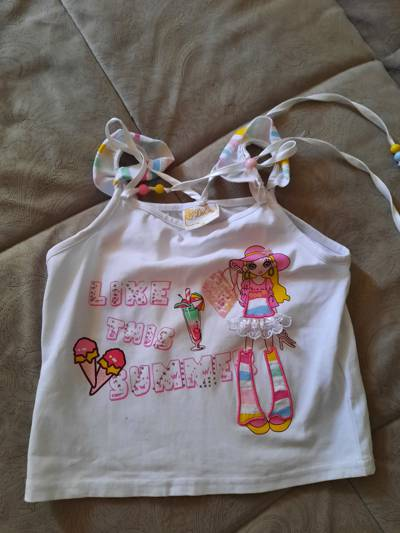

In [24]:
print("Top Image Before Prelimenary Pre-Processing")
Image(filename=path+'b9c867a9-6036-4936-bee4-1704de612352.jpg') 

Top Image After Prelimenary Pre-Processing


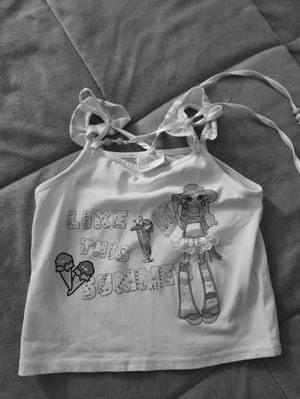

In [25]:
print("Top Image After Prelimenary Pre-Processing")
Image(filename=path2+'Top//b9c867a9-6036-4936-bee4-1704de612352.jpg') 

Shoes Image Before Prelimenary Pre-Processing


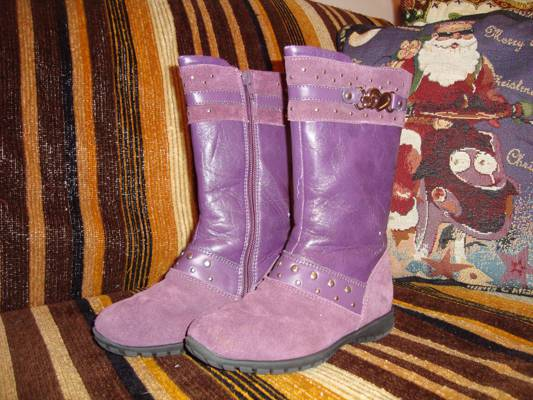

In [26]:
print("Shoes Image Before Prelimenary Pre-Processing")
Image(filename=path+'30feae84-c7b1-4e72-8b42-0f7736d42cd5.jpg') 

Shoes Image After Prelimenary Pre-Processing


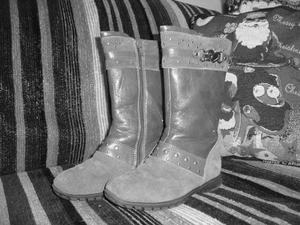

In [27]:
print("Shoes Image After Prelimenary Pre-Processing")
Image(filename=path2+'Shoes//30feae84-c7b1-4e72-8b42-0f7736d42cd5.jpg') 

Outerwear Image Before Prelimenary Pre-Processing


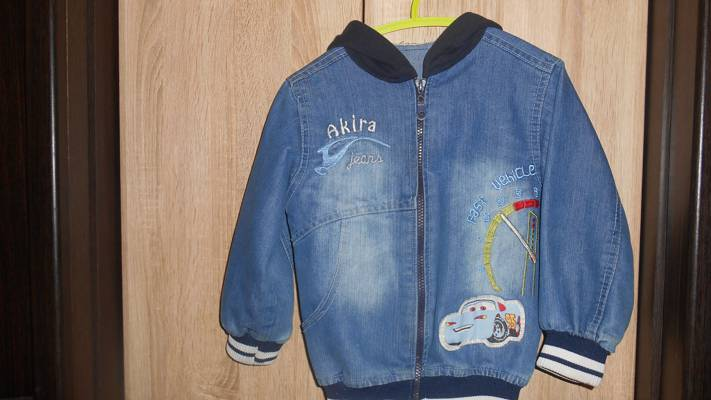

In [28]:
print("Outerwear Image Before Prelimenary Pre-Processing")
Image(filename=path+'6d221c5c-03b7-4095-9fc5-84dc751baa23.jpg') 

Outwear Image After Prelimenary Pre-Processing


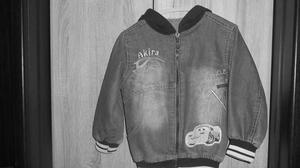

In [29]:
print("Outwear Image After Prelimenary Pre-Processing")
Image(filename=path2+'Outwear//6d221c5c-03b7-4095-9fc5-84dc751baa23.jpg') 

Blouse Image Before Prelimenary Pre-Processing


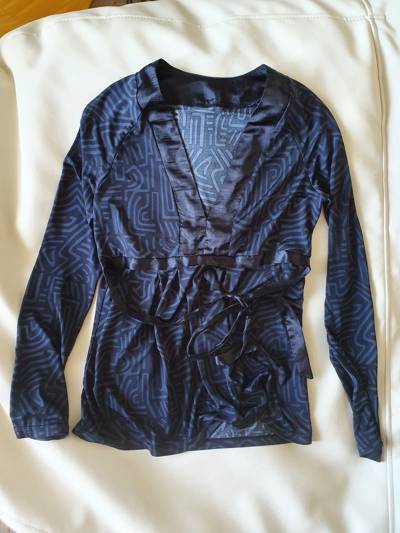

In [30]:
print("Blouse Image Before Prelimenary Pre-Processing")
Image(filename=path+'6cafa4cb-234a-4f34-bd45-312ed2fc9d9b.jpg') 

In [31]:
print

<function print>

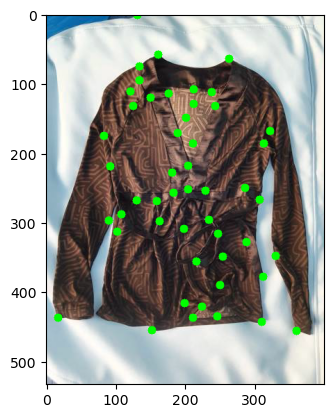

-1

In [32]:
# Importing the libraries
import cv2
import numpy as np
  
# Reading the image and converting into B?W
image = cv2.imread(path+'6cafa4cb-234a-4f34-bd45-312ed2fc9d9b.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Applying the function
corners = cv2.goodFeaturesToTrack(
    gray_image, maxCorners=50, qualityLevel=0.02, minDistance=20)
corners = np.float32(corners)
  
for item in corners:
    x, y = item[0]
    x = int(x)
    y = int(y)
    cv2.circle(image, (x, y), 6, (0, 255, 0), -1)
  
# Showing the image

plt.imshow(image)
plt.show()
#cv2.imshow('good_features', image)
cv2.waitKey()

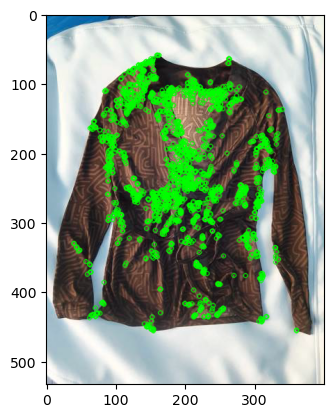

-1

In [33]:
  
# Reading the image and converting into B/W
image = cv2.imread(path+'6cafa4cb-234a-4f34-bd45-312ed2fc9d9b.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Applying the function
orb = cv2.ORB_create(nfeatures=2000)
kp, des = orb.detectAndCompute(gray_image, None)
  
# Drawing the keypoints
kp_image = cv2.drawKeypoints(image, kp, None, color=(0, 255, 0), flags=0)
  
  
plt.imshow(kp_image)
plt.show()
#cv2.imshow('ORB', kp_image)
cv2.waitKey()

In [53]:
import random
import os
import scipy.misc
import scipy.ndimage
import skimage.filters
import sklearn.metrics
import imageio

import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model


In [35]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

C:\Users\Adam\AppData\Local\Temp\ipykernel_17800\921741759.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  grayscale = imageio.imread(path2+'Outwear//6d221c5c-03b7-4095-9fc5-84dc751baa23.jpg')


skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


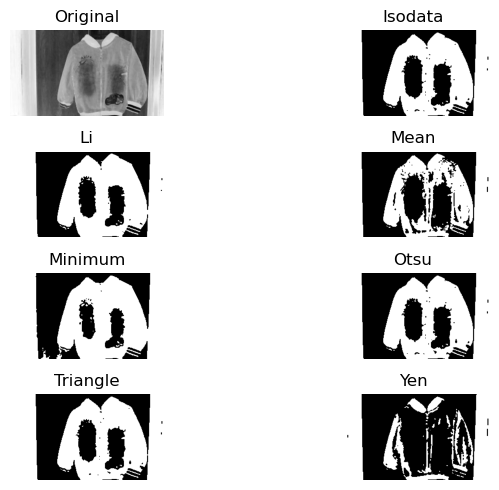

In [56]:
#median_filtered = scipy.ndimage.median_filter(, size=3)
grayscale = imageio.imread(path2+'Outwear//6d221c5c-03b7-4095-9fc5-84dc751baa23.jpg')


grayscale = 255 - grayscale

median_filtered = scipy.ndimage.median_filter(grayscale, size=3)



result = skimage.filters.thresholding.try_all_threshold(median_filtered)

C:\Users\Adam\AppData\Local\Temp\ipykernel_17800\258454756.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  grayscale = imageio.imread(path2+'Shoes//30feae84-c7b1-4e72-8b42-0f7736d42cd5.jpg')


skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


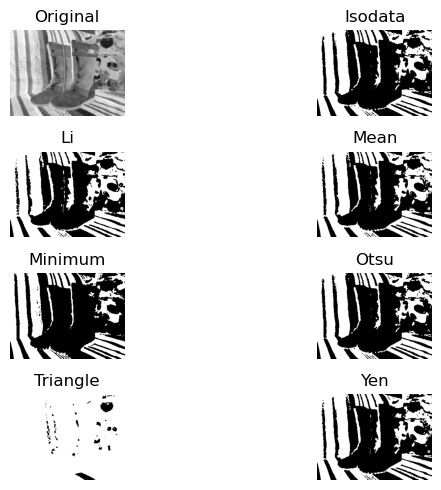

In [57]:
#median_filtered = scipy.ndimage.median_filter(, size=3)
grayscale = imageio.imread(path2+'Shoes//30feae84-c7b1-4e72-8b42-0f7736d42cd5.jpg')


grayscale = 255 - grayscale

median_filtered = scipy.ndimage.median_filter(grayscale, size=3)



result = skimage.filters.thresholding.try_all_threshold(median_filtered)

In [ ]:
from pylab import *
from sklearn.decomposition import PCA
import pickle


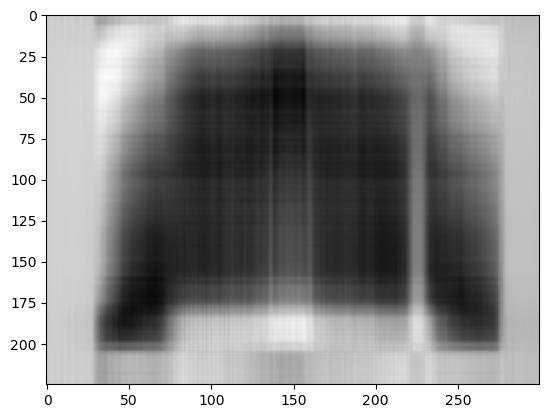

In [77]:
#Best 2 Features for Blazer
#Create Folder
item_folder = Path(path2+"Best2FeatureBlazer")
item_folder.mkdir(parents=True, exist_ok=True)

# iterate over the unique label 
for images in os.listdir(path2+"\\Blazer"):
    
    img = cv2.imread(path2+"\\Blazer\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(2)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best2FeatureBlazer\\"+images, bbox_inches='tight')

 

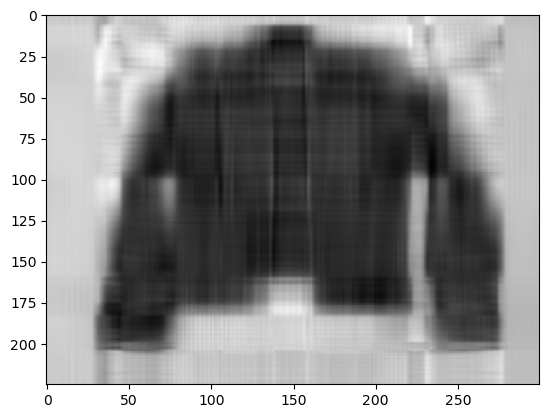

In [78]:
#Best 5 Features for Blazer
#Create Folder
item_folder = Path(path2+"Best5FeatureBlazer")
item_folder.mkdir(parents=True, exist_ok=True)

# iterate over the unique label 
for images in os.listdir(path2+"\\Blazer"):
    
    img = cv2.imread(path2+"\\Blazer\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(5)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best5FeatureBlazer\\"+images, bbox_inches='tight')

 

    
    

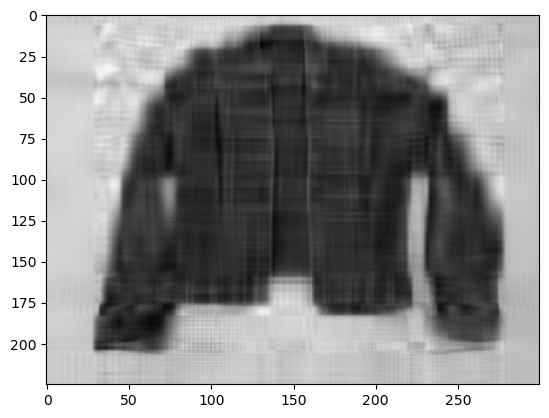

In [79]:
#Best 10 Features for Blazer
#Create Folder
item_folder = Path(path2+"Best10FeatureBlazer")
item_folder.mkdir(parents=True, exist_ok=True)

# iterate over the unique label 
for images in os.listdir(path2+"\\Blazer"):
    
    img = cv2.imread(path2+"\\Blazer\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(10)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best10FeatureBlazer\\"+images, bbox_inches='tight')

 

    
    

In [80]:
#Best 2 Features for Dress
#Create Folder
item_folder = Path(path2+"Best2FeatureDress")
item_folder.mkdir(parents=True, exist_ok=True)

# iterate over the unique label 
for images in os.listdir(path2+"\\Dress"):
    
    img = cv2.imread(path2+"\\Dress\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(2)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best2FeatureDress\\"+images, bbox_inches='tight')

 

    
    

In [ ]:
#Best 5 Features for Dress
#Create Folder
item_folder = Path(path2+"Best5FeatureDress")
item_folder.mkdir(parents=True, exist_ok=True)

# iterate over the unique label 
for images in os.listdir(path2+"\\Dress"):
    
    img = cv2.imread(path2+"\\Dress\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(5)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best5FeatureDress\\"+images, bbox_inches='tight')

 

    
    

In [ ]:
#Best 10 Features for Dress
#Create Folder
item_folder = Path(path2+"Best10FeatureDress")
item_folder.mkdir(parents=True, exist_ok=True)

# iterate over the unique label 
for images in os.listdir(path2+"\\Dress"):
    
    img = cv2.imread(path2+"\\Dress\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(10)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best10FeatureDress\\"+images, bbox_inches='tight')

 

    
    

In [ ]:
#Best 2 Features for Pants
#Create Folder
item_folder = Path(path2+"Best2FeaturePants")
item_folder.mkdir(parents=True, exist_ok=True)

# iterate over the unique label 
for images in os.listdir(path2+"\\Pants"):
    
    img = cv2.imread(path2+"\\Pants\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(2)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best2FeaturePants\\"+images, bbox_inches='tight')

 

    
    

In [ ]:
#Best 5 Features for Pants
#Create Folder
item_folder = Path(path2+"Best5FeaturePants")
item_folder.mkdir(parents=True, exist_ok=True)

# iterate over the unique label 
for images in os.listdir(path2+"\\Pants"):
    
    img = cv2.imread(path2+"\\Pants\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(5)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best5FeaturePants\\"+images, bbox_inches='tight')

 

    
    

In [ ]:
#Best 10 Features for Pants
#Create Folder
item_folder = Path(path2+"Best10FeaturePants")
item_folder.mkdir(parents=True, exist_ok=True)

# iterate over the unique label 
for images in os.listdir(path2+"\\Pants"):
    
    img = cv2.imread(path2+"\\Pants\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(10)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best10FeaturePants\\"+images, bbox_inches='tight')

 

    
    